<a href="https://colab.research.google.com/github/Manass20/Cardiovascular-risk-prediction-Manas/blob/main/Cardiovascular_risk_prediction_Manas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Project Title : Cardiovascular Risk Prediction : Predicting ten years risk of coronary heart disease***

#**INTRODUCTION: A MUST READ**

####Cardiovascular diseases (CVDs) are a group of disorders of the heart and blood vessels.According to a report by WHO updated in June, 2021:

*   **Cardiovascular diseases (CVDs) are the leading cause of death globally.**

*  **An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.**

*   **Over three quarters of CVD deaths take place in low- and middle-income countries.**

####Although there are various kinds of cardiovascular disease like coronary heart disease(CHD), cerebrovascular disease, peripheral arterial disease, rheumatic heart disease, congenital heart disease, deep vein thrombosis and pulmonary embolism. But our main focus for this analysis will be CHD only.

####Coronary heart disease is the term that describes what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries.

####Over time, the walls of your arteries can become furred up with fatty deposits. This process is known as atherosclerosis and the fatty deposits are called atheroma.

####Atherosclerosis can be caused by lifestyle factors, such as smoking and regularly drinking excessive amounts of alcohol, unhealthy diet and physical inactivity.

####You're also more at risk of getting atherosclerosis if you have conditions like high cholesterol, high blood pressure (hypertension) or diabetes.

####Coronary heart disease cannot be cured but treatment can help manage the symptoms and reduce the chances of problems such as heart attacks.

####Treatment can include :

####lifestyle changes, such as regular exercise and stopping smoking, medicines, angioplasty – where balloons and stents are used to treat narrow heart arteries surgery.

#**So, where does machine learning fit it ?**

####Due to the multi-contributory risk factors such as high blood pressure, high cholesterol, diabetes and various others it gets very constrained  to identify the risk factors for some of the patients. That's why we are turning to data mining and machine learning for predicting the disease to avert the risks.

####Machine learning (ML), due to its distinction in pattern detection and classification, proves to be effective in assisting decision making and risk assessment from the large quantity of data produced by the healthcare industry on heart disease.






## <b> Problem Description </b>


####The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includesover 4,000 records and 17 attributes.

##**Variables**

####Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.


##**Data Description**

##***Demographic***

• **Sex**: male or female("M" or "F")

• **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated towhole numbers, the concept of age is continuous)

##***Behavioral***

• **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")

• **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

##***Medical( history)***

• **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)

• **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)

• **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)

• **Diabetes**: whether or not the patient had diabetes (Nominal)

##***Medical(current)***

• **Tot Chol**: total cholesterol level (Continuous)

• **Sys BP**: systolic blood pressure (Continuous)

• **Dia BP**: diastolic blood pressure (Continuous)

• **BMI**: Body Mass Index (Continuous)

• **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• **Glucose**: glucose level (Continuous)

##***Predict variable (desired target)***

• **TenYearCHD**: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [1]:
# Importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

In [2]:
# Lets make handshake of note book with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Reading the dataset 
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/PROJECTS/ML - Class(Cardio vascular risk prediction)/data_cardiovascular_risk.csv')

In [4]:
# Checking dimension of data set 
df.shape

(3390, 17)

In [5]:
# First look of our data 

df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
# Checking column names

df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [7]:
# Brief description of our data set

df.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
# lets check the duplicate
len(df[df.duplicated()])

0

In [9]:
#Check for null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

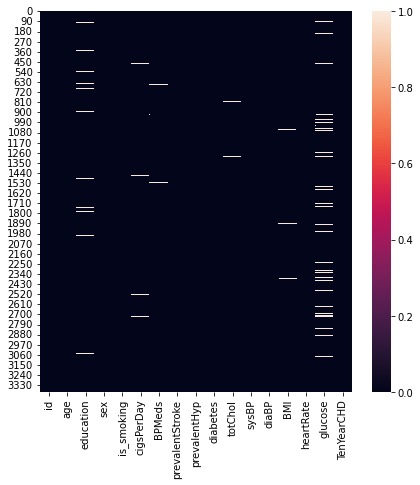

In [10]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(7,7))
sns.heatmap(missing_values)

In [11]:
df.dropna(inplace=True)

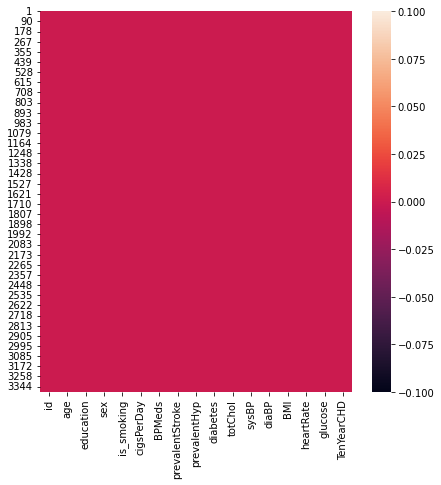

In [12]:
# Plotting the heatmap for missing values 
missing_values = df.isnull()
plt.figure(figsize=(7,7))
sns.heatmap(missing_values)

Let's Check for outliers

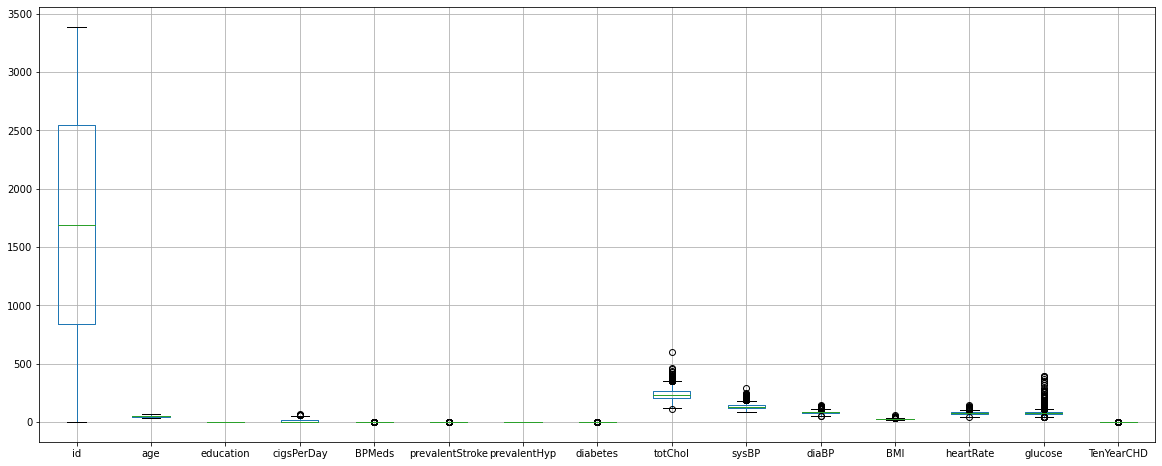

In [13]:
plt.figure(figsize=(20,8))
df.boxplot()

There are outliers in some features.

Let's check the correlation between the feature.

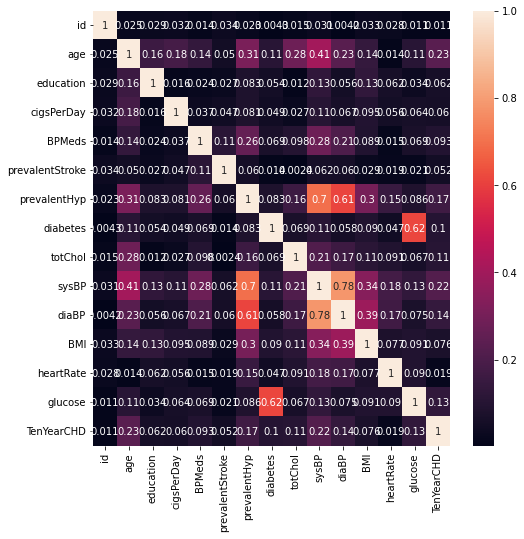

In [14]:
# Plotting the correlation matrix using heatmap
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)


There is no significant correlation between independent and dependant variables but there is a high correlation within independent variables

# ***Analysis of Categorical features***

In [15]:
df['sex'].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

Let's check which gender is more prone to heart disease

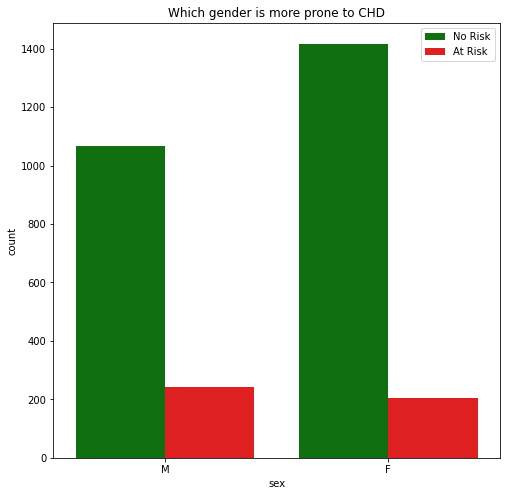

In [16]:
my_palette = {0 : 'green' , 1 : 'red'}
#10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)
plt.figure(figsize = (8,8))
sns.countplot(x = df['sex'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which gender is more prone to CHD")
plt.legend(['No Risk','At Risk'])
plt.show()

It is showing that out of 1307 male around 200 males are having heart disease and out of 1620 females around 200 females are having heart disease. It is indicating that males and females with almost coressponding 15% and 12% are suffering from heart disease.

Diabetes analysis

In [17]:
df['diabetes'].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [18]:
df.groupby(['diabetes','sex','TenYearCHD'])['TenYearCHD'].count()

diabetes  sex  TenYearCHD
0         F    0             1388
               1              190
          M    0             1045
               1              225
1         F    0               29
               1               13
          M    0               21
               1               16
Name: TenYearCHD, dtype: int64

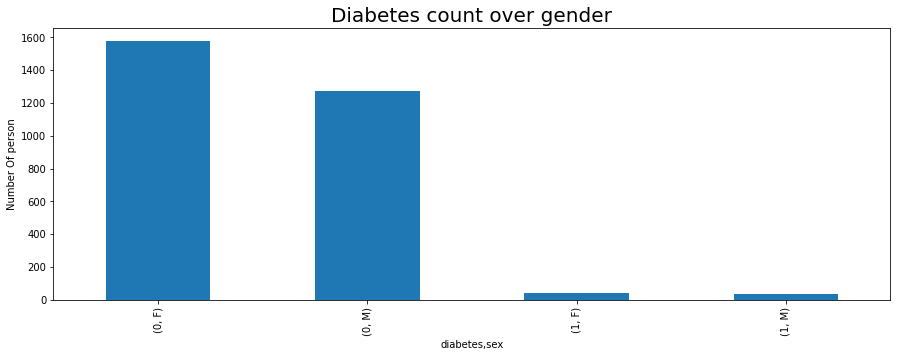

In [19]:
diabetes_Count=df.groupby(['diabetes','sex'])['TenYearCHD'].count()

plt.rcParams['figure.figsize'] = (15, 5)
diabetes_Count.plot(kind='bar')
plt.title('Diabetes count over gender',size=20)
plt.ylabel('Number Of person')
plt.show()

It is showing that out of 79 diabetes patients 42 are female and 37 male.

Smoking wise risk analysis

In [20]:
df['is_smoking'].value_counts()

NO     1480
YES    1447
Name: is_smoking, dtype: int64

In [21]:
df.groupby(['is_smoking','sex','TenYearCHD'])['TenYearCHD'].count()

is_smoking  sex  TenYearCHD
NO          F    0             857
                 1             125
            M    0             416
                 1              82
YES         F    0             560
                 1              78
            M    0             650
                 1             159
Name: TenYearCHD, dtype: int64

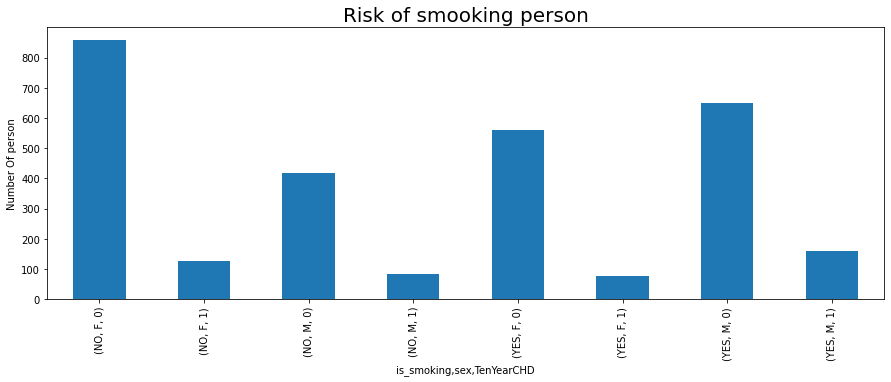

In [22]:
smooking_effect=df.groupby(['is_smoking','sex','TenYearCHD'])['TenYearCHD'].count()

plt.rcParams['figure.figsize'] = (15, 5)
smooking_effect.plot(kind='bar')
plt.title('Risk of smooking person',size=20)
plt.ylabel('Number Of person')
plt.show()

In this dataset out of 1447 smooking persons, total 237 persons are affected by heart disease and out of them 78 are female and 159 are male.

Hypertension wise risk analysis

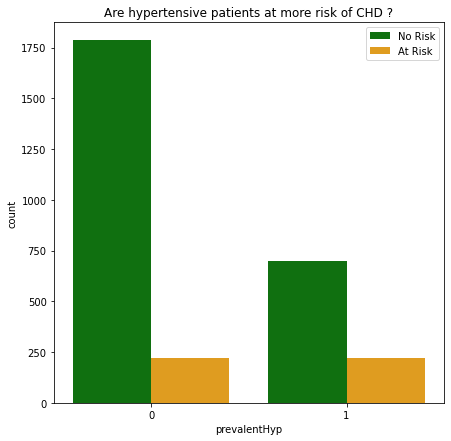

In [23]:
plt.figure(figsize = (7,7))
my_palette = {0 : 'green' , 1 : 'orange'}
sns.countplot(x = df['prevalentHyp'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are hypertensive patients at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

From this plot we can say that there is a chance of having heart disease of a person who is going through hypertension, which is an obvious thing.


Blood pressure wise risk analysis

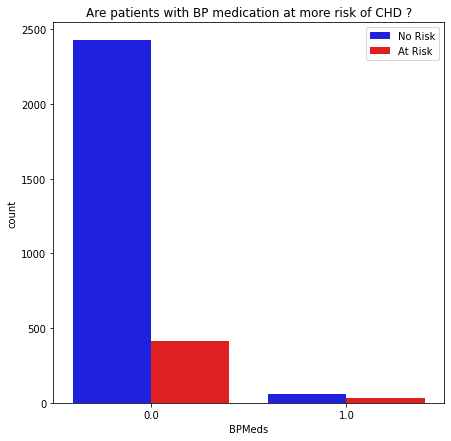

In [24]:
my_palette = {0 : 'blue' , 1 : 'red'}
plt.figure(figsize = (7,7))
sns.countplot(x = df['BPMeds'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are patients with BP medication at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

This plot showing that if a person is going through bp, then there is a higher chance of having a heart disease.

Risk analysis of smookers

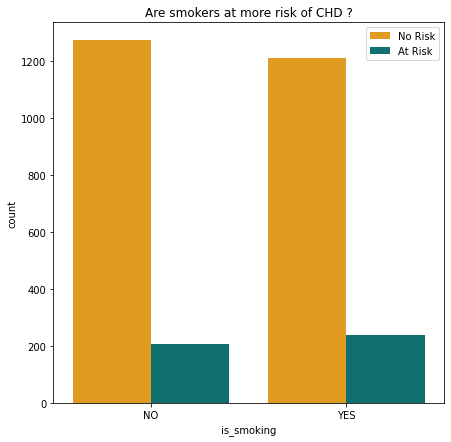

In [25]:
my_palette = {0 : 'orange' , 1 : 'teal'}
plt.figure(figsize = (7,7))
sns.countplot(x = df['is_smoking'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Are smokers at more risk of CHD ?")
plt.legend(['No Risk','At Risk'])
plt.show()

From this plot we can say that persons who are not smookers also at risk of having CHD.

Age wise Analysis

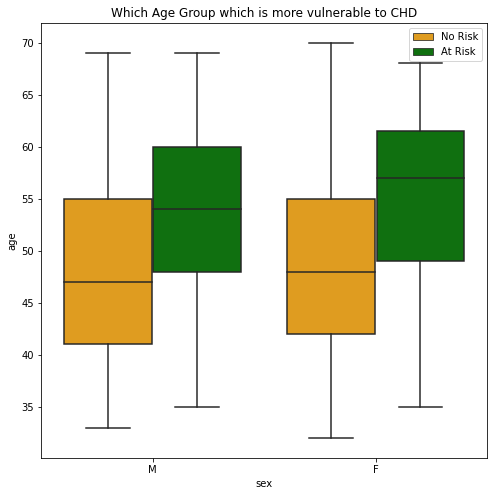

In [26]:
my_palette = {0 : 'orange' , 1 : 'green'}
plt.figure(figsize = (8,8))
ax = sns.boxplot(x = df['sex'], y = df['age'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Which Age Group which is more vulnerable to CHD")
handles, _ = ax.get_legend_handles_labels()          
ax.legend(handles, ['No Risk','At Risk'], loc="best")
plt.show()

This plot showing that both males and females of age between 50-60 are at risk zone of having CHD.

Heart rate Wise risk analysis

In [27]:
def heartRate_data(row):
    if row['heartRate'] <= 59:
        value = 'Low'
    elif row['heartRate'] < 100:
        value = 'Normal'
    else:
        value = "High"
    
    return value

In [28]:
df['heartRateLabel'] = df.apply(heartRate_data, axis = 1)

In [29]:
df['heartRateLabel'].value_counts()

Normal    2666
High       131
Low        130
Name: heartRateLabel, dtype: int64

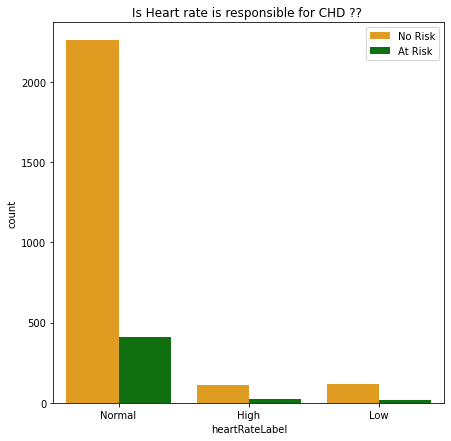

In [30]:
plt.figure(figsize = (7,7))
sns.countplot(x = df['heartRateLabel'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Is Heart rate is responsible for CHD ?? ")
plt.legend(['No Risk','At Risk'])
plt.show()

There are some normal heart rated persons having heart disease.

In [31]:
df.drop(columns=['heartRateLabel'], inplace=True)


Earlier Heart stroke wise analysis

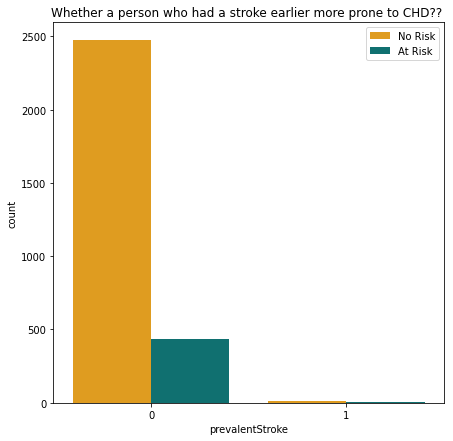

In [32]:
plt.figure(figsize = (7,7))
my_palette = {0 : 'orange' , 1 : 'teal'}
sns.countplot(x = df['prevalentStroke'], hue = df['TenYearCHD'], palette = my_palette)
plt.title("Whether a person who had a stroke earlier more prone to CHD?? ")
plt.legend(['No Risk' , 'At Risk'])
plt.show()

Some persons who did not had a stroke earlier also in some sorts of having CHD.

Blood pressure wise analysis

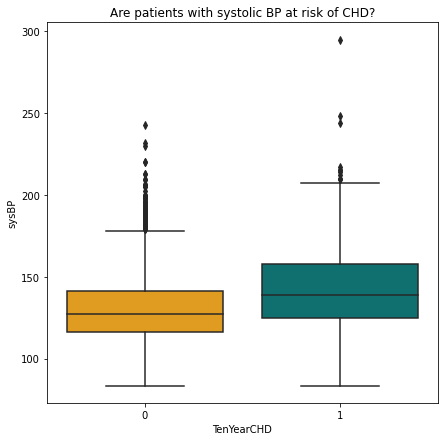

In [33]:
plt.figure(figsize = (7,7))
sns.boxplot(df['TenYearCHD'], df['sysBP'], palette = my_palette)
plt.title("Are patients with systolic BP at risk of CHD?")
plt.show()

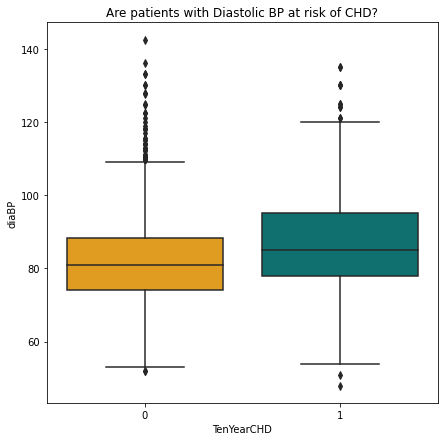

In [34]:
plt.figure(figsize = (7,7))
sns.boxplot(df['TenYearCHD'], df['diaBP'], palette = my_palette)
plt.title("Are patients with Diastolic BP at risk of CHD?")
plt.show()

It seems that both numbers are equally important in monitoring heart issues.

# ***Feature Engineering***

Systolic and Diastolic blood pressure has a high correlation that can be commonly classified into hypertension

In [35]:
def blood_presure_classification(SysBP, DiaBP):
  if (SysBP < 90) or (DiaBP < 60):
    return 0 # 'Hypotension'
  if (SysBP < 120) and (DiaBP < 80):
    return 1 # 'Optimal'
  if (SysBP < 130) or (DiaBP < 86):
    return 2 # 'Normal'
  if (SysBP < 140) or (DiaBP < 90):
    return 3 # 'PreHypertensive'
  if (SysBP > 140) and (DiaBP < 90):
    return 4 # 'IsolatedSystolicHypertension'
  if (SysBP < 160) or (DiaBP < 100):
    return 5 # 'GradeI'
  if (SysBP < 180) or (DiaBP < 110):
    return 6 # 'GradeII'
  return 7 # 'GradeIII'

In [36]:
df['Hypertension'] = df.apply(lambda x: blood_presure_classification(x['sysBP'],x['diaBP']),axis=1)
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7


Blood glucose levels can be used to classify the severity of Diabetes

In [37]:
def diabetes_grade(glucose):
  if glucose < 100:
    return 1 # 'Normal'
  if glucose < 125:
    return 2 # 'Prediabetic'
  if glucose < 200:
    return 3 # 'Mild'
  if glucose < 400:
    return 4 # 'Moderate'
  return 5 # 'Severe'

In [38]:
df['Diabetes'] = df['glucose'].apply(lambda x: diabetes_grade(x))
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,Hypertension,Diabetes
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,5,1
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,1,1
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,3,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,2,1
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1,7,1


In [39]:
# remove unnecessary features
df.drop(columns=['id','prevalentHyp', 'sysBP', 'diaBP', 'glucose', 'diabetes', 'is_smoking'], inplace=True)


In [40]:
df.head()

,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes
1,36,4.0,M,0.0,0.0,0,212.0,29.77,72.0,0,5,1
2,46,1.0,F,10.0,0.0,0,250.0,20.35,88.0,0,1,1
3,50,1.0,M,20.0,0.0,0,233.0,28.26,68.0,1,3,1
4,64,1.0,F,30.0,0.0,0,241.0,26.42,70.0,0,2,1
5,61,3.0,F,0.0,0.0,0,272.0,32.80,85.0,1,7,1


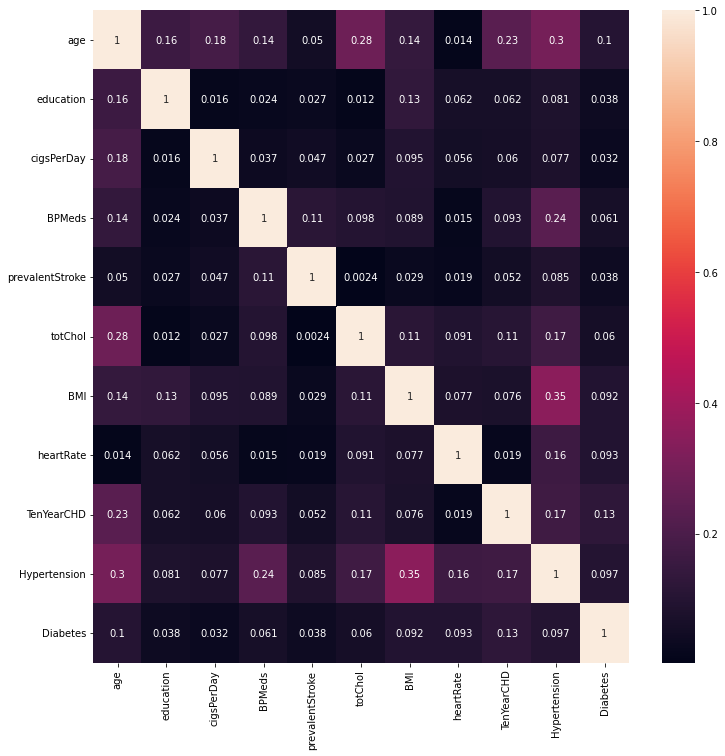

In [41]:
# Let's check the correlation using heatmap
plt.figure(figsize=(12,12))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True)

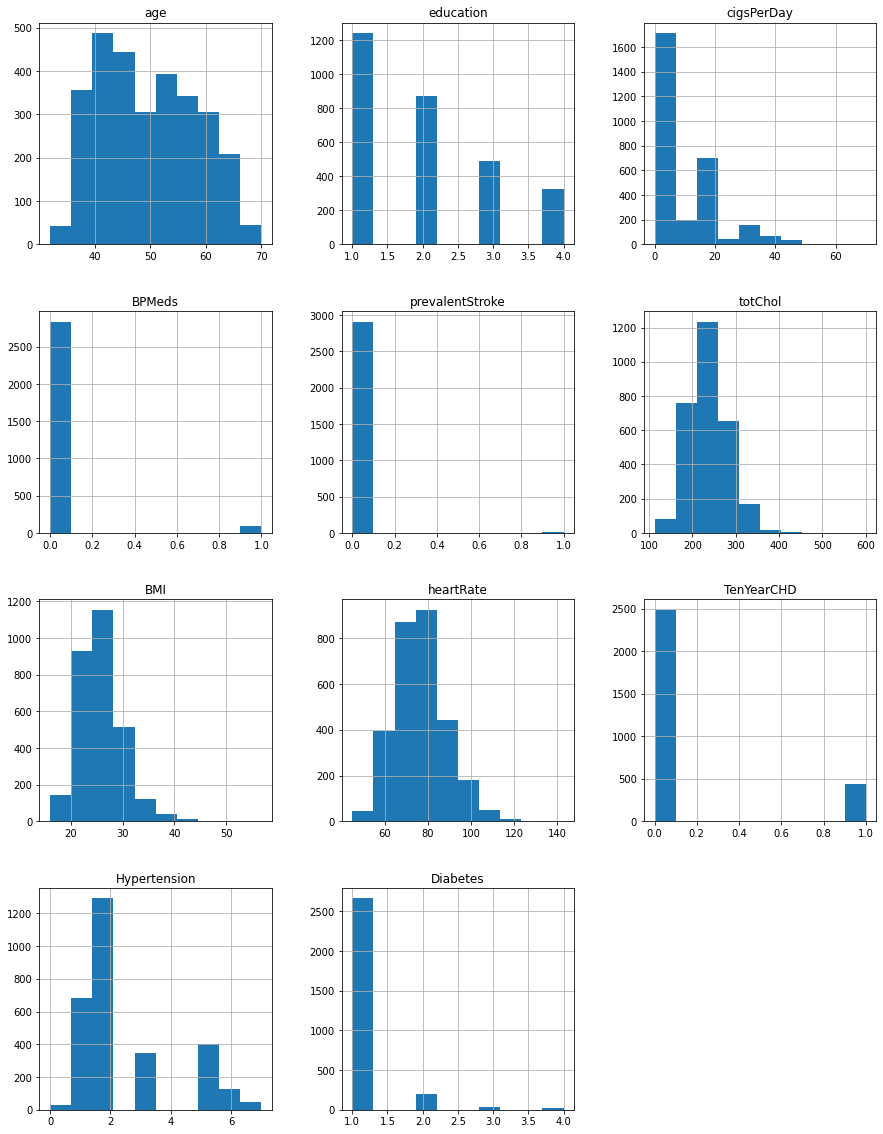

In [42]:
# Let's plot histogram to check the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [43]:
# remove not useful columns
df.drop(columns=['BPMeds', 'prevalentStroke'], inplace=True)

In [44]:
df.head()

,age,education,sex,cigsPerDay,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes
1,36,4.0,M,0.0,212.0,29.77,72.0,0,5,1
2,46,1.0,F,10.0,250.0,20.35,88.0,0,1,1
3,50,1.0,M,20.0,233.0,28.26,68.0,1,3,1
4,64,1.0,F,30.0,241.0,26.42,70.0,0,2,1
5,61,3.0,F,0.0,272.0,32.80,85.0,1,7,1


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2927 entries, 1 to 3389
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           2927 non-null   int64  
 1   education     2927 non-null   float64
 2   sex           2927 non-null   object 
 3   cigsPerDay    2927 non-null   float64
 4   totChol       2927 non-null   float64
 5   BMI           2927 non-null   float64
 6   heartRate     2927 non-null   float64
 7   TenYearCHD    2927 non-null   int64  
 8   Hypertension  2927 non-null   int64  
 9   Diabetes      2927 non-null   int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 316.1+ KB


Let's convert categorical data to numerical

In [46]:
df['sex'] = df['sex'].apply(lambda x: 1 if x=='M' else 0)

In [47]:
df.head()

,age,education,sex,cigsPerDay,totChol,BMI,heartRate,TenYearCHD,Hypertension,Diabetes
1,36,4.0,1,0.0,212.0,29.77,72.0,0,5,1
2,46,1.0,0,10.0,250.0,20.35,88.0,0,1,1
3,50,1.0,1,20.0,233.0,28.26,68.0,1,3,1
4,64,1.0,0,30.0,241.0,26.42,70.0,0,2,1
5,61,3.0,0,0.0,272.0,32.80,85.0,1,7,1


In [48]:
dependent_variable = 'TenYearCHD'
independent_variable = list(df.columns)
independent_variable.remove(dependent_variable)
print(independent_variable)

['age', 'education', 'sex', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'Hypertension', 'Diabetes']


In [49]:
X = df[independent_variable].values
y = df[dependent_variable].values

SMOTE

In [50]:
# the numbers before SMOTE
num_before = dict(Counter(y))

#perform SMOTE

# define pipeline
under = RandomUnderSampler(sampling_strategy=0.8)
over = SMOTE(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after SMOTE
num_after =dict(Counter(y_smote))
print(num_before, num_after)

{0: 2483, 1: 444} {0: 2482, 1: 1986}


In [51]:
#Let's split our data
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=.2)

In [52]:
# scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

# ***Logistic Regression***

In [53]:
# create and train logistic regression model
logistic_regression_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [54]:
#Check ourmodel coefficients
logistic_regression_model.coef_

array([[ 0.65786537, -0.10572028,  0.19939   ,  0.30935982,  0.11983366,
         0.00687497, -0.05641936,  0.36112365,  0.26424467]])

In [55]:
#Check the predicted probabilities
train_preds = logistic_regression_model.predict(X_train)
test_preds = logistic_regression_model.predict(X_test)

In [56]:
#Check the accuracy scores
train_accuracy = accuracy_score(train_preds,y_train)
test_accuracy = accuracy_score(test_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.6734750979294908
The accuracy on test data is  0.6834451901565995


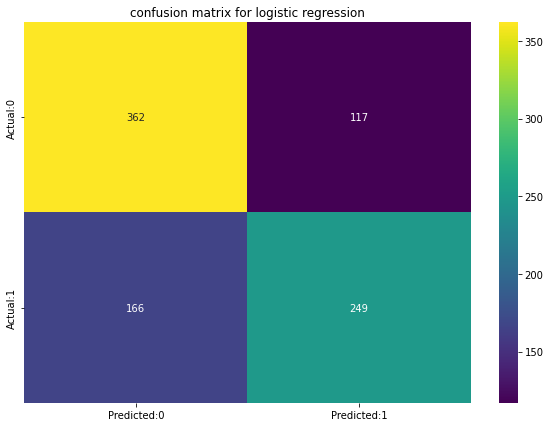

In [57]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for logistic regression')
plt.show()

In [58]:
# print acurracy and roc_auc score
print('ROCAUC score:', roc_auc_score(y_test, test_preds))
print('Accuracy score:', accuracy_score(y_test, test_preds))

# Print the classification report for train and test
print(classification_report(y_train, train_preds))
print("\n")
print(classification_report(y_test, test_preds))

ROCAUC score: 0.6778705636743215
Accuracy score: 0.6834451901565995
              precision    recall  f1-score   support

           0       0.69      0.75      0.72      2003
           1       0.64      0.58      0.61      1571

    accuracy                           0.67      3574
   macro avg       0.67      0.66      0.66      3574
weighted avg       0.67      0.67      0.67      3574



              precision    recall  f1-score   support

           0       0.69      0.76      0.72       479
           1       0.68      0.60      0.64       415

    accuracy                           0.68       894
   macro avg       0.68      0.68      0.68       894
weighted avg       0.68      0.68      0.68       894



## ***K-Nearest Neighbour***

In [59]:
# calculate accuracy score for first 10 neighbors
# Setup arrays to store training and test accuracies
neighbors = 10
train_accuracy = np.empty(neighbors)
test_accuracy = np.empty(neighbors)

for i in range(1, neighbors + 1):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    # Fit the model
    knn.fit(X_train, y_train)
    # Compute accuracy on the training set
    train_accuracy[i - 1] = knn.score(X_train, y_train)
    # Compute accuracy on the test set
    test_accuracy[i - 1] = knn.score(X_test, y_test)

In [60]:
# print accuracy
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

Train Accuracy:  [1.         0.96698377 0.90934527 0.9037493  0.8651371  0.86177952
 0.83296027 0.82848349 0.81225518 0.80386122]
Test Accuracy:  [0.87807606 0.83780761 0.82774049 0.80536913 0.80201342 0.79977629
 0.79306488 0.77852349 0.77293065 0.77069351]


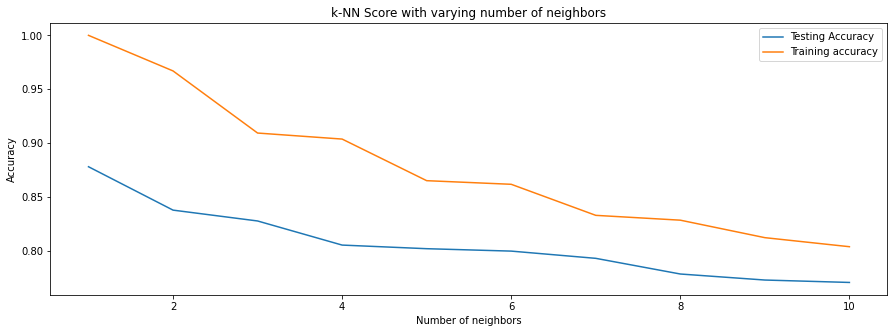

In [61]:
# Generate plot
plt.title('k-NN Score with varying number of neighbors')
x_axis = [i for i in range(1,11)]
plt.plot(x_axis, test_accuracy, label='Testing Accuracy')
plt.plot(x_axis, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

Let's find the best parameter

In [62]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [63]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [64]:
knn_cv.best_score_

0.8282082623259093

In [65]:
knn_cv.best_params_

{'n_neighbors': 1}

In [66]:
#Let's check predictions
knn_predict = knn_cv.predict(X_test)


In [67]:
#check accuracy
knn_acc = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_acc*100,2)}%")

Using k-nearest neighbours we get an accuracy of 87.81%


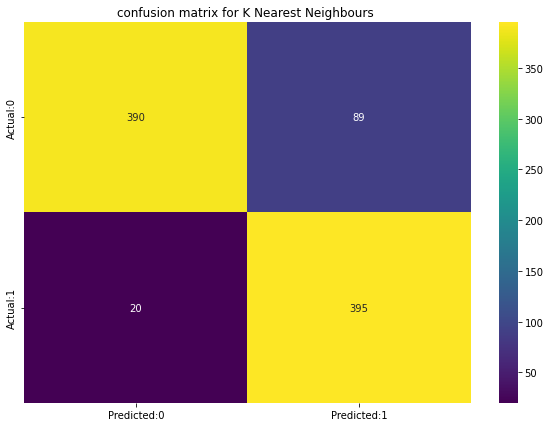

In [68]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for K Nearest Neighbours ')
plt.show()

In [69]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.81      0.88       479
           1       0.82      0.95      0.88       415

    accuracy                           0.88       894
   macro avg       0.88      0.88      0.88       894
weighted avg       0.89      0.88      0.88       894



# ***Decision Tree Classifier***

In [70]:
#Let's train and build our model
decision_tree_model = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes= 50,random_state=0)
decision_tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=50, random_state=0)

In [71]:
train_preds = decision_tree_model.predict(X_train)
test_preds = decision_tree_model.predict(X_test)

In [72]:
#Measuring Accuracy and AUC-ROC score
testing_accuracy = accuracy_score(y_test, test_preds) * 100
print(f'the testing accuracy is {testing_accuracy}')
training_accuracy = accuracy_score(y_train,train_preds) *100
print(f'the training accuracy is {training_accuracy}')

the testing accuracy is 81.4317673378076
the training accuracy is 85.47845551203133


In [73]:
#check accuracy
dt_acc = accuracy_score(y_test,test_preds)
print(f"Using Decision Tree we get an accuracy of {round(dt_acc*100,2)}%")

Using Decision Tree we get an accuracy of 81.43%


[Text(0.5083333333333333, 0.9583333333333334, 'X[7] <= -0.475\nentropy = 0.989\nsamples = 3574\nvalue = [2003, 1571]'),
 Text(0.3380952380952381, 0.875, 'X[0] <= 0.445\nentropy = 0.871\nsamples = 2017\nvalue = [1429, 588]'),
 Text(0.23809523809523808, 0.7916666666666666, 'X[2] <= -1.01\nentropy = 0.766\nsamples = 1475\nvalue = [1146, 329]'),
 Text(0.19047619047619047, 0.7083333333333334, 'X[1] <= 1.126\nentropy = 0.555\nsamples = 775\nvalue = [675, 100]'),
 Text(0.1523809523809524, 0.625, 'X[1] <= 0.134\nentropy = 0.641\nsamples = 541\nvalue = [453, 88]'),
 Text(0.13333333333333333, 0.5416666666666666, 'X[4] <= 1.373\nentropy = 0.577\nsamples = 525\nvalue = [453, 72]'),
 Text(0.09523809523809523, 0.4583333333333333, 'X[6] <= 0.144\nentropy = 0.524\nsamples = 483\nvalue = [426, 57]'),
 Text(0.0761904761904762, 0.375, 'X[1] <= 0.104\nentropy = 0.646\nsamples = 303\nvalue = [253, 50]'),
 Text(0.05714285714285714, 0.2916666666666667, 'X[1] <= -0.95\nentropy = 0.784\nsamples = 167\nvalue = 

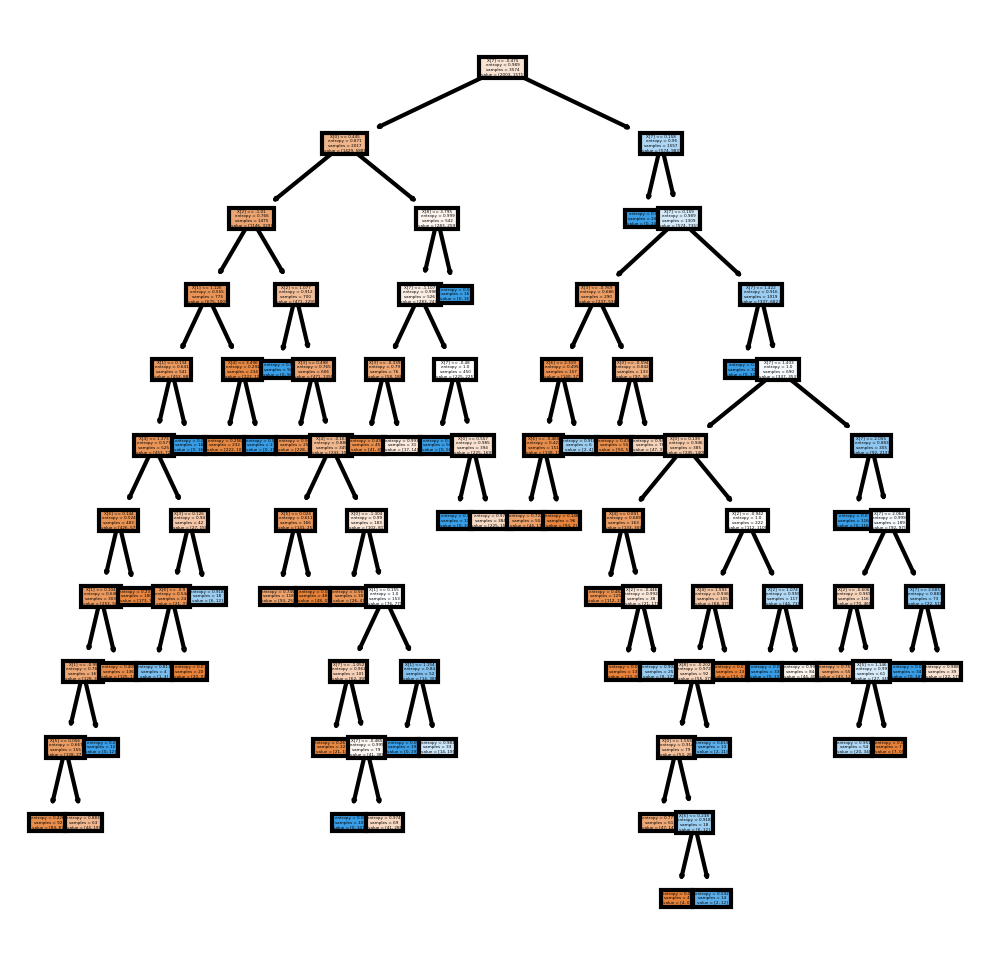

In [74]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree_model,filled=True)

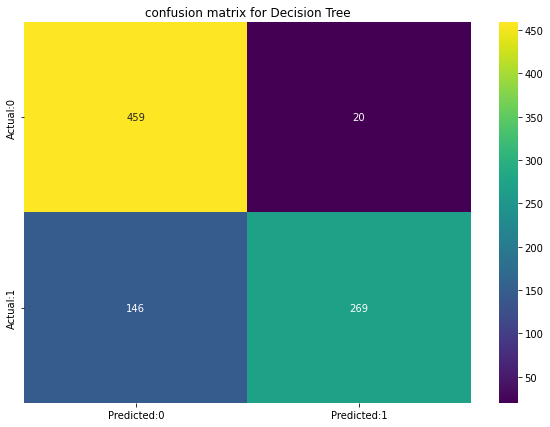

In [75]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Decision Tree')
plt.show()

In [76]:
#classification report for test data
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       479
           1       0.93      0.65      0.76       415

    accuracy                           0.81       894
   macro avg       0.84      0.80      0.81       894
weighted avg       0.84      0.81      0.81       894



# ***Random Forest Classifier***

In [77]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=15,random_state=30,min_samples_split=3,criterion='entropy')

In [78]:
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=3,
                       random_state=30)

In [79]:
train_preds =  classifier.predict(X_train)
test_preds  = classifier.predict(X_test)

In [80]:
#check accuracy
rf_acc = accuracy_score(y_test,test_preds)
print(f"Using Random forest we get an accuracy of {round(rf_acc*100,2)}%")

Using Random forest we get an accuracy of 89.49%


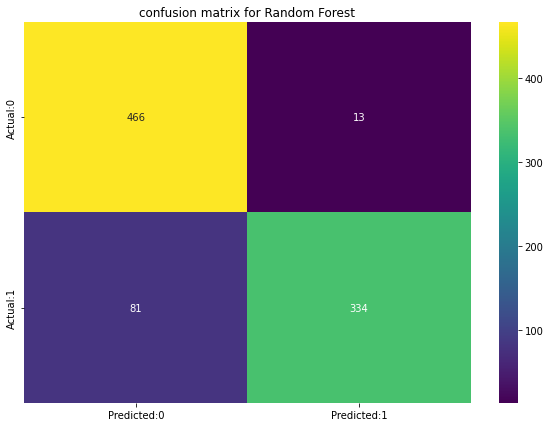

In [81]:
conf_mat = confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for Random Forest')
plt.show()

In [82]:
#classification report for test
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91       479
           1       0.96      0.80      0.88       415

    accuracy                           0.89       894
   macro avg       0.91      0.89      0.89       894
weighted avg       0.90      0.89      0.89       894



# ***XGBoost Classifier***

In [83]:
xg_cla = xgb.XGBClassifier(objective='binary:logistic',colsample_bytree = 0.7, learning_rate = 0.01,
                max_depth = 10, alpha = 10, n_estimators = 10,subsample=1)

In [84]:
xg_cla.fit(X_test,y_test)

XGBClassifier(alpha=10, colsample_bytree=0.7, learning_rate=0.01, max_depth=10,
              n_estimators=10)

In [85]:
train_preds = xg_cla.predict(X_train)
test_preds = xg_cla.predict(X_test)

In [86]:
# check accuracy
xgb_acc = accuracy_score(y_test,test_preds)
print(f"Using XGB classifier we get an accuracy of {round(xgb_acc*100,2)}%")

Using XGB classifier we get an accuracy of 95.41%


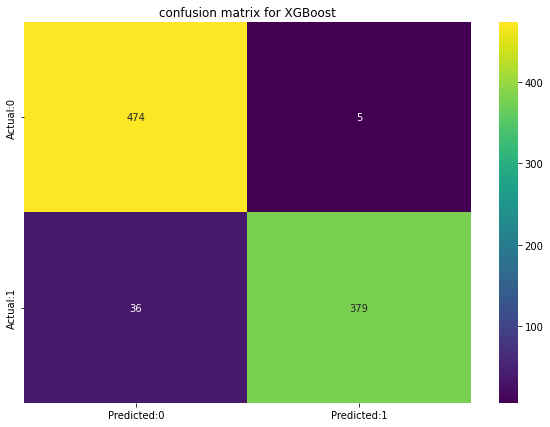

In [87]:
#plot the confusion matrix
conf_mat = confusion_matrix(y_test,test_preds)
conf_matrix=pd.DataFrame(data=conf_mat,index=['Actual:0','Actual:1'],columns=['Predicted:0','Predicted:1'])
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='viridis')
plt.title('confusion matrix for XGBoost')
plt.show()

In [88]:
print(classification_report(y_test, test_preds))
print('\n')
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       479
           1       0.99      0.91      0.95       415

    accuracy                           0.95       894
   macro avg       0.96      0.95      0.95       894
weighted avg       0.96      0.95      0.95       894



              precision    recall  f1-score   support

           0       0.81      0.87      0.84      2003
           1       0.82      0.74      0.78      1571

    accuracy                           0.81      3574
   macro avg       0.81      0.81      0.81      3574
weighted avg       0.81      0.81      0.81      3574



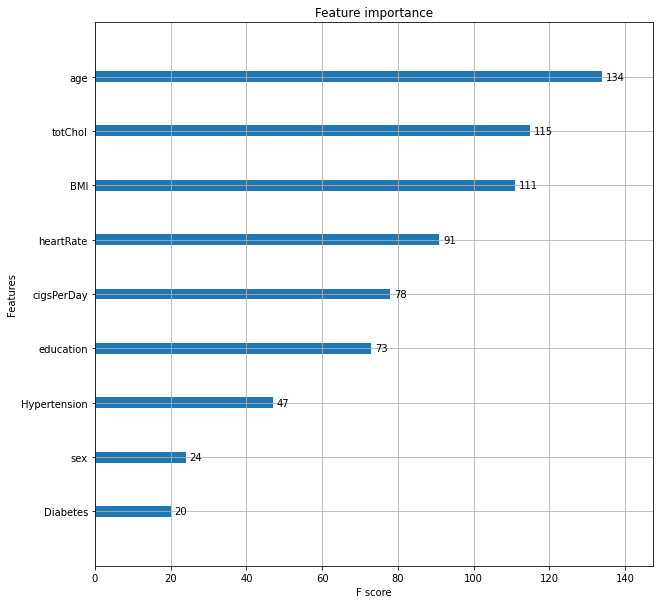

In [89]:
#Let's check feature importance
orig_feature_names = list(df.columns)
orig_feature_names.remove('TenYearCHD')
xg_cla.get_booster().feature_names = orig_feature_names
ax = xgb.plot_importance(xg_cla)
ax.figure.set_size_inches(10, 10)
plt.show()